# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

## **Research Background** ##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

## **Research Design** ##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

_# H0 (answer in words):_

Low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.

## **Compute Masculinity Score** ##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


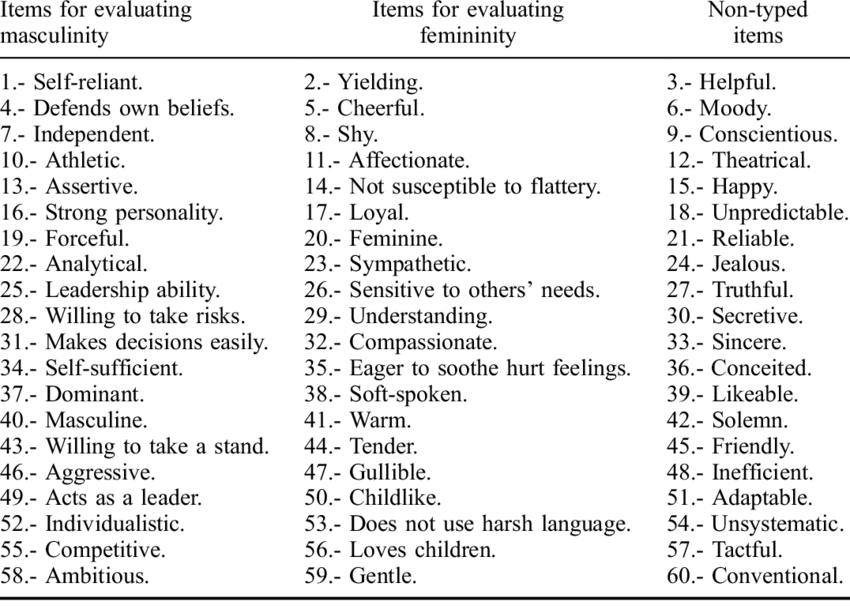

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

### **Riveter** ###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [5]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [6]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [7]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [8]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

riveter = Riveter()
riveter.load_sap_lexicon('power') # Loads 'power' lexicon
scores_dict = {} # Creates an empty dictionary

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [9]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter = Riveter()
    riveter.load_sap_lexicon('power')
    riveter.train(segments,
             text_ids,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'}
                 )
    ### Code taken from Riveter Demo

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:18<27:39, 18.65s/it]

2024-03-14 19:59:54 Complete!
Story ID: 4706144, Masculine Power Score: 0.09090909090909091



Processing stories:   2%|▏         | 2/90 [00:35<25:54, 17.67s/it]

2024-03-14 20:00:11 Complete!
Story ID: 4752980, Masculine Power Score: 0.25



Processing stories:   3%|▎         | 3/90 [00:51<24:08, 16.64s/it]

2024-03-14 20:00:26 Complete!
Story ID: 4621698, Masculine Power Score: 0.5714285714285714



Processing stories:   4%|▍         | 4/90 [01:10<25:25, 17.74s/it]

2024-03-14 20:00:45 Complete!
Story ID: 3651108, Masculine Power Score: 0.11764705882352941



Processing stories:   6%|▌         | 5/90 [01:29<25:49, 18.23s/it]

2024-03-14 20:01:05 Complete!
Story ID: 5282729, Masculine Power Score: 0.2



Processing stories:   7%|▋         | 6/90 [01:48<25:59, 18.56s/it]

2024-03-14 20:01:24 Complete!
Story ID: 5533886, Masculine Power Score: 0.0



Processing stories:   8%|▊         | 7/90 [02:10<27:07, 19.61s/it]

2024-03-14 20:01:46 Complete!
Story ID: 4547622, Masculine Power Score: 0.05714285714285714



Processing stories:   9%|▉         | 8/90 [02:32<27:44, 20.30s/it]

2024-03-14 20:02:07 Complete!
Story ID: 16177508, Masculine Power Score: 0.13333333333333333



Processing stories:  10%|█         | 9/90 [02:51<26:56, 19.95s/it]

2024-03-14 20:02:27 Complete!
Story ID: 15745185, Masculine Power Score: -0.10526315789473684



 33%|███▎      | 1/3 [00:09<00:19,  9.83s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [03:10<26:10, 19.63s/it]

2024-03-14 20:02:45 Complete!
Story ID: 15654528, Masculine Power Score: 0.18604651162790697



Processing stories:  12%|█▏        | 11/90 [03:28<25:14, 19.17s/it]

2024-03-14 20:03:04 Complete!
Story ID: 7448155, Masculine Power Score: 0.325



Processing stories:  13%|█▎        | 12/90 [03:47<24:52, 19.13s/it]

2024-03-14 20:03:23 Complete!
Story ID: 4983847, Masculine Power Score: 0.10344827586206896



Processing stories:  14%|█▍        | 13/90 [04:05<24:16, 18.91s/it]

2024-03-14 20:03:41 Complete!
Story ID: 3313118, Masculine Power Score: -0.23333333333333334



Processing stories:  16%|█▌        | 14/90 [04:24<23:41, 18.70s/it]

2024-03-14 20:03:59 Complete!
Story ID: 3290390, Masculine Power Score: -0.10638297872340426



Processing stories:  17%|█▋        | 15/90 [04:45<24:21, 19.48s/it]

2024-03-14 20:04:21 Complete!
Story ID: 36435301, Masculine Power Score: 0.05555555555555555



Processing stories:  18%|█▊        | 16/90 [05:04<23:47, 19.29s/it]

2024-03-14 20:04:39 Complete!
Story ID: 36575491, Masculine Power Score: 0.2631578947368421



Processing stories:  19%|█▉        | 17/90 [05:25<24:01, 19.75s/it]

2024-03-14 20:05:00 Complete!
Story ID: 35225224, Masculine Power Score: 0.24324324324324326



Processing stories:  20%|██        | 18/90 [05:42<22:40, 18.89s/it]

2024-03-14 20:05:17 Complete!
Story ID: 4594527, Masculine Power Score: 0.2222222222222222



Processing stories:  21%|██        | 19/90 [05:59<21:56, 18.54s/it]

2024-03-14 20:05:35 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



Processing stories:  22%|██▏       | 20/90 [06:17<21:23, 18.34s/it]

2024-03-14 20:05:53 Complete!
Story ID: 36408319, Masculine Power Score: 0.15789473684210525



Processing stories:  23%|██▎       | 21/90 [06:37<21:36, 18.79s/it]

2024-03-14 20:06:12 Complete!
Story ID: 35762659, Masculine Power Score: 0.21428571428571427



Processing stories:  24%|██▍       | 22/90 [06:55<21:01, 18.55s/it]

2024-03-14 20:06:30 Complete!
Story ID: 35603194, Masculine Power Score: 0.3684210526315789



Processing stories:  26%|██▌       | 23/90 [07:13<20:22, 18.25s/it]

2024-03-14 20:06:48 Complete!
Story ID: 35344306, Masculine Power Score: 0.1388888888888889



Processing stories:  27%|██▋       | 24/90 [07:29<19:21, 17.59s/it]

2024-03-14 20:07:04 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



Processing stories:  28%|██▊       | 25/90 [07:49<19:59, 18.45s/it]

2024-03-14 20:07:25 Complete!
Story ID: 36064474, Masculine Power Score: 0.1



Processing stories:  29%|██▉       | 26/90 [08:07<19:32, 18.32s/it]

2024-03-14 20:07:43 Complete!
Story ID: 36024820, Masculine Power Score: 0.16666666666666666



Processing stories:  30%|███       | 27/90 [08:28<20:06, 19.15s/it]

2024-03-14 20:08:04 Complete!
Story ID: 35182330, Masculine Power Score: 0.06818181818181818



Processing stories:  31%|███       | 28/90 [08:48<20:02, 19.40s/it]

2024-03-14 20:08:24 Complete!
Story ID: 36567496, Masculine Power Score: 0.21052631578947367



Processing stories:  32%|███▏      | 29/90 [09:13<21:17, 20.94s/it]

2024-03-14 20:08:48 Complete!
Story ID: 35560330, Masculine Power Score: 0.13333333333333333



Processing stories:  33%|███▎      | 30/90 [09:37<21:58, 21.97s/it]

2024-03-14 20:09:13 Complete!
Story ID: 35877496, Masculine Power Score: 0.125



Processing stories:  34%|███▍      | 31/90 [09:57<21:01, 21.39s/it]

2024-03-14 20:09:33 Complete!
Story ID: 35957410, Masculine Power Score: 0.2857142857142857



Processing stories:  36%|███▌      | 32/90 [10:17<20:18, 21.01s/it]

2024-03-14 20:09:53 Complete!
Story ID: 30947654, Masculine Power Score: 0.04



Processing stories:  37%|███▋      | 33/90 [10:35<19:02, 20.05s/it]

2024-03-14 20:10:11 Complete!
Story ID: 36332707, Masculine Power Score: -0.09523809523809523



Processing stories:  38%|███▊      | 34/90 [10:55<18:47, 20.14s/it]

2024-03-14 20:10:31 Complete!
Story ID: 35967940, Masculine Power Score: 0.16071428571428573



Processing stories:  39%|███▉      | 35/90 [11:15<18:14, 19.91s/it]

2024-03-14 20:10:50 Complete!
Story ID: 35001073, Masculine Power Score: 0.05



Processing stories:  40%|████      | 36/90 [11:34<17:46, 19.74s/it]

2024-03-14 20:11:10 Complete!
Story ID: 35138911, Masculine Power Score: 0.1388888888888889



Processing stories:  41%|████      | 37/90 [11:51<16:47, 19.02s/it]

2024-03-14 20:11:27 Complete!
Story ID: 35280397, Masculine Power Score: 0.22727272727272727



Processing stories:  42%|████▏     | 38/90 [12:12<16:53, 19.48s/it]

2024-03-14 20:11:47 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708333333333333



Processing stories:  43%|████▎     | 39/90 [12:32<16:46, 19.74s/it]

2024-03-14 20:12:08 Complete!
Story ID: 34995673, Masculine Power Score: 0.16363636363636364



Processing stories:  44%|████▍     | 40/90 [12:57<17:36, 21.14s/it]

2024-03-14 20:12:32 Complete!
Story ID: 33477346, Masculine Power Score: 0.43333333333333335



Processing stories:  46%|████▌     | 41/90 [13:15<16:40, 20.42s/it]

2024-03-14 20:12:51 Complete!
Story ID: 36840832, Masculine Power Score: -0.23076923076923078



Processing stories:  47%|████▋     | 42/90 [13:35<16:13, 20.29s/it]

2024-03-14 20:13:11 Complete!
Story ID: 30896276, Masculine Power Score: 0.14285714285714285



Processing stories:  48%|████▊     | 43/90 [13:55<15:48, 20.19s/it]

2024-03-14 20:13:31 Complete!
Story ID: 37363471, Masculine Power Score: 0.42857142857142855



Processing stories:  49%|████▉     | 44/90 [14:14<15:12, 19.83s/it]

2024-03-14 20:13:50 Complete!
Story ID: 36984901, Masculine Power Score: 0.0



Processing stories:  50%|█████     | 45/90 [14:37<15:28, 20.64s/it]

2024-03-14 20:14:12 Complete!
Story ID: 33353644, Masculine Power Score: -0.05660377358490566



Processing stories:  51%|█████     | 46/90 [14:56<14:54, 20.32s/it]

2024-03-14 20:14:32 Complete!
Story ID: 37002835, Masculine Power Score: -0.14285714285714285



Processing stories:  52%|█████▏    | 47/90 [15:15<14:07, 19.71s/it]

2024-03-14 20:14:50 Complete!
Story ID: 5630824, Masculine Power Score: 0.3157894736842105



Processing stories:  53%|█████▎    | 48/90 [15:35<13:55, 19.89s/it]

2024-03-14 20:15:11 Complete!
Story ID: 10053617, Masculine Power Score: 0.25806451612903225



Processing stories:  54%|█████▍    | 49/90 [15:56<13:50, 20.26s/it]

2024-03-14 20:15:32 Complete!
Story ID: 1572659, Masculine Power Score: 0.23333333333333334



Processing stories:  56%|█████▌    | 50/90 [16:19<13:58, 20.97s/it]

2024-03-14 20:15:54 Complete!
Story ID: 7450573, Masculine Power Score: 0.1



Processing stories:  57%|█████▋    | 51/90 [16:37<13:00, 20.02s/it]

2024-03-14 20:16:12 Complete!
Story ID: 6918676, Masculine Power Score: 0.05263157894736842



Processing stories:  58%|█████▊    | 52/90 [16:58<12:55, 20.42s/it]

2024-03-14 20:16:33 Complete!
Story ID: 6075402, Masculine Power Score: 0.36363636363636365



Processing stories:  59%|█████▉    | 53/90 [17:17<12:19, 19.98s/it]

2024-03-14 20:16:52 Complete!
Story ID: 11101779, Masculine Power Score: 0.3333333333333333



Processing stories:  60%|██████    | 54/90 [17:38<12:09, 20.26s/it]

2024-03-14 20:17:13 Complete!
Story ID: 11321331, Masculine Power Score: 0.08108108108108109



Processing stories:  61%|██████    | 55/90 [17:57<11:34, 19.84s/it]

2024-03-14 20:17:32 Complete!
Story ID: 12284853, Masculine Power Score: 0.022222222222222223



Processing stories:  62%|██████▏   | 56/90 [18:16<11:08, 19.67s/it]

2024-03-14 20:17:51 Complete!
Story ID: 12282003, Masculine Power Score: 0.08888888888888889



Processing stories:  63%|██████▎   | 57/90 [18:32<10:14, 18.62s/it]

2024-03-14 20:18:08 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [18:49<09:40, 18.14s/it]

2024-03-14 20:18:25 Complete!
Story ID: 4228053, Masculine Power Score: 0.21739130434782608



Processing stories:  66%|██████▌   | 59/90 [19:18<11:00, 21.32s/it]

2024-03-14 20:18:53 Complete!
Story ID: 12127317, Masculine Power Score: 0.13513513513513514



Processing stories:  67%|██████▋   | 60/90 [19:43<11:14, 22.48s/it]

2024-03-14 20:19:19 Complete!
Story ID: 12010134, Masculine Power Score: 0.21739130434782608



Processing stories:  68%|██████▊   | 61/90 [20:06<10:57, 22.66s/it]

2024-03-14 20:19:42 Complete!
Story ID: 11510919, Masculine Power Score: 0.4230769230769231



Processing stories:  69%|██████▉   | 62/90 [20:33<11:08, 23.88s/it]

2024-03-14 20:20:08 Complete!
Story ID: 8145802, Masculine Power Score: 0.22727272727272727



Processing stories:  70%|███████   | 63/90 [20:52<10:03, 22.36s/it]

2024-03-14 20:20:27 Complete!
Story ID: 6637942, Masculine Power Score: -0.13043478260869565



Processing stories:  71%|███████   | 64/90 [21:14<09:40, 22.31s/it]

2024-03-14 20:20:49 Complete!
Story ID: 7427905, Masculine Power Score: -0.02702702702702703



Processing stories:  72%|███████▏  | 65/90 [21:33<08:53, 21.33s/it]

2024-03-14 20:21:08 Complete!
Story ID: 3893857, Masculine Power Score: 0.1206896551724138



Processing stories:  73%|███████▎  | 66/90 [21:51<08:06, 20.28s/it]

2024-03-14 20:21:26 Complete!
Story ID: 33040258, Masculine Power Score: 0.25



Processing stories:  74%|███████▍  | 67/90 [22:09<07:32, 19.69s/it]

2024-03-14 20:21:45 Complete!
Story ID: 33858850, Masculine Power Score: -0.16666666666666666



Processing stories:  76%|███████▌  | 68/90 [22:33<07:44, 21.10s/it]

2024-03-14 20:22:09 Complete!
Story ID: 2775776, Masculine Power Score: 0.25



Processing stories:  77%|███████▋  | 69/90 [22:55<07:23, 21.12s/it]

2024-03-14 20:22:30 Complete!
Story ID: 3197963, Masculine Power Score: 0.3



Processing stories:  78%|███████▊  | 70/90 [23:25<08:00, 24.03s/it]

2024-03-14 20:23:01 Complete!
Story ID: 12395199, Masculine Power Score: 0.14634146341463414



Processing stories:  79%|███████▉  | 71/90 [23:53<07:53, 24.94s/it]

2024-03-14 20:23:28 Complete!
Story ID: 10934010, Masculine Power Score: 0.2962962962962963



Processing stories:  80%|████████  | 72/90 [24:10<06:50, 22.82s/it]

2024-03-14 20:23:46 Complete!
Story ID: 12301116, Masculine Power Score: 0.034482758620689655



Processing stories:  81%|████████  | 73/90 [24:35<06:38, 23.46s/it]

2024-03-14 20:24:11 Complete!
Story ID: 12706317, Masculine Power Score: -0.08695652173913043



Processing stories:  82%|████████▏ | 74/90 [25:01<06:27, 24.22s/it]

2024-03-14 20:24:37 Complete!
Story ID: 11499468, Masculine Power Score: 0.06896551724137931



Processing stories:  83%|████████▎ | 75/90 [25:23<05:52, 23.50s/it]

2024-03-14 20:24:59 Complete!
Story ID: 12184146, Masculine Power Score: 0.32



Processing stories:  84%|████████▍ | 76/90 [25:44<05:17, 22.65s/it]

2024-03-14 20:25:19 Complete!
Story ID: 12201333, Masculine Power Score: 0.12



Processing stories:  86%|████████▌ | 77/90 [26:07<04:56, 22.79s/it]

2024-03-14 20:25:42 Complete!
Story ID: 11496030, Masculine Power Score: 0.16



Processing stories:  87%|████████▋ | 78/90 [26:29<04:32, 22.69s/it]

2024-03-14 20:26:05 Complete!
Story ID: 11510277, Masculine Power Score: 0.16216216216216217



Processing stories:  88%|████████▊ | 79/90 [26:51<04:06, 22.45s/it]

2024-03-14 20:26:27 Complete!
Story ID: 10772274, Masculine Power Score: 0.3793103448275862



Processing stories:  89%|████████▉ | 80/90 [27:12<03:39, 21.99s/it]

2024-03-14 20:26:48 Complete!
Story ID: 12646050, Masculine Power Score: 0.041666666666666664



Processing stories:  90%|█████████ | 81/90 [27:34<03:16, 21.78s/it]

2024-03-14 20:27:09 Complete!
Story ID: 11161479, Masculine Power Score: -0.013157894736842105



Processing stories:  91%|█████████ | 82/90 [27:54<02:50, 21.33s/it]

2024-03-14 20:27:29 Complete!
Story ID: 12069936, Masculine Power Score: 0.061224489795918366



Processing stories:  92%|█████████▏| 83/90 [28:14<02:27, 21.01s/it]

2024-03-14 20:27:50 Complete!
Story ID: 12285972, Masculine Power Score: 0.41935483870967744



Processing stories:  93%|█████████▎| 84/90 [28:32<02:00, 20.10s/it]

2024-03-14 20:28:08 Complete!
Story ID: 12372702, Masculine Power Score: -0.03571428571428571



Processing stories:  94%|█████████▍| 85/90 [28:50<01:38, 19.60s/it]

2024-03-14 20:28:26 Complete!
Story ID: 12610496, Masculine Power Score: 0.1



Processing stories:  96%|█████████▌| 86/90 [29:11<01:19, 19.83s/it]

2024-03-14 20:28:46 Complete!
Story ID: 10970472, Masculine Power Score: 0.06060606060606061



Processing stories:  97%|█████████▋| 87/90 [29:30<00:58, 19.48s/it]

2024-03-14 20:29:05 Complete!
Story ID: 12084552, Masculine Power Score: 0.3157894736842105



Processing stories:  98%|█████████▊| 88/90 [29:50<00:39, 19.84s/it]

2024-03-14 20:29:26 Complete!
Story ID: 12727119, Masculine Power Score: 0.017543859649122806



Processing stories:  99%|█████████▉| 89/90 [30:08<00:19, 19.17s/it]

2024-03-14 20:29:43 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [30:29<00:00, 20.33s/it]

2024-03-14 20:30:05 Complete!
Story ID: 10859508, Masculine Power Score: 0.24324324324324326


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [10]:
# Q2 (code)
df.sample()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
14,7448155,2016,1038,12.0,3.0,Love At First Sound\n\nHe stood only a few ste...,0.325


In [11]:
df.head() # Extra

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000


## **Compute Lexical Richness Score** ##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [12]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

## **Regressions** ##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


In [13]:
# Q3a (code): Check data distribution

df.describe() # Shows summary statistics

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.139553,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.155706,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.233333,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.050658,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.134234,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.243243,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.571429,0.491349


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'lexical_richness'}>, <Axes: >, <Axes: >]],
      dtype=object)

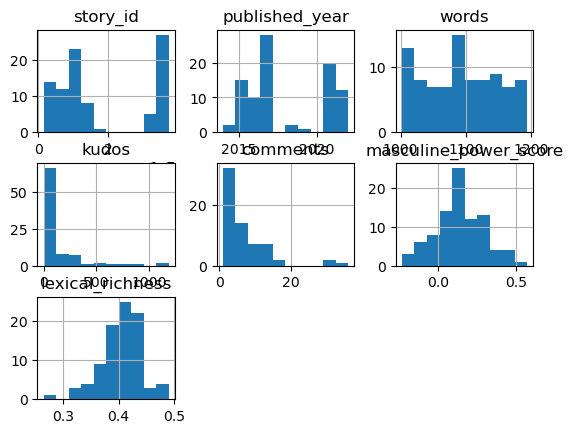

In [14]:
# Q3b (code): compute some descriptive statistics

df.hist() # .hist (histogram) is a representation of the distribution of data

In [15]:
# Q3c (code): Check for any missing values

print(df.isnull()) # Checks whether a value is "null"
print(df.isnull().sum()) # Gives summary of the code above

    story_id  published_year  words  kudos  comments  story_content  \
0      False           False  False  False     False          False   
1      False           False  False  False      True          False   
3      False           False  False  False     False          False   
5      False           False  False  False     False          False   
7      False           False  False  False      True          False   
..       ...             ...    ...    ...       ...            ...   
95     False           False  False  False     False          False   
96     False           False  False  False     False          False   
97     False           False  False  False     False          False   
98     False           False  False  False     False          False   
99     False           False  False  False     False          False   

    masculine_power_score  lexical_richness  
0                   False             False  
1                   False             False  
3        

In [16]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
import numpy as np

df.replace(np.nan, 0, inplace=True) # Replaces NaN values with 0

df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


In [17]:
# Q3c (code): Check for any missing values (again)

print(df.isnull()) # Checks whether a value is "null"
print(df.isnull().sum()) # Gives summary of the code above

    story_id  published_year  words  kudos  comments  story_content  \
0      False           False  False  False     False          False   
1      False           False  False  False     False          False   
3      False           False  False  False     False          False   
5      False           False  False  False     False          False   
7      False           False  False  False     False          False   
..       ...             ...    ...    ...       ...            ...   
95     False           False  False  False     False          False   
96     False           False  False  False     False          False   
97     False           False  False  False     False          False   
98     False           False  False  False     False          False   
99     False           False  False  False     False          False   

    masculine_power_score  lexical_richness  
0                   False             False  
1                   False             False  
3        

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

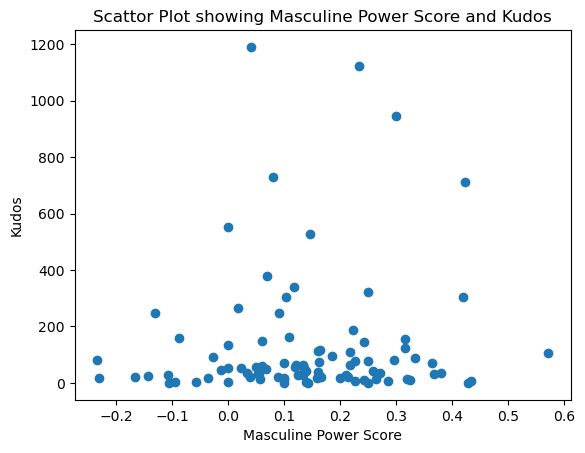

In [18]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

masculine_power_score = df['masculine_power_score']
kudos = df['kudos']
# While "plt.scatter(df['masculine_power_score'], df['kudos'])" works, this output is more descriptive

plt.scatter(x=masculine_power_score, y=kudos) # Creates scatter plot using pyplot
#'masculine_power_score' on the X axis and "kudos" on the Y axis
plt.xlabel('Masculine Power Score') # Names the X axis
plt.ylabel('Kudos') # Names the Y axis
plt.title('Scattor Plot showing Masculine Power Score and Kudos') # Adds title
plt.show()

**Q5. Multiple Regression and Analysis**

In [19]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = df[['masculine_power_score', 'published_year', 'words', 'lexical_richness']]
y = df[['kudos']]

model = LinearRegression()
model.fit(X, y)

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

### Code taken from Week 4 lab exercises

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     4.288
Date:                Thu, 14 Mar 2024   Prob (F-statistic):            0.00329
Time:                        20:30:08   Log-Likelihood:                -608.01
No. Observations:                  90   AIC:                             1226.
Df Residuals:                      85   BIC:                             1239.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.014e+

In [20]:
# Calculating R-squared for the model (isolated)
r_squared = model_sm.rsquared
print(f'R-squared: {r_squared}')

# Adjusted R-squared for multiple regression
adjusted_r_squared = model_sm.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

### Code taken from Week 4 lab exercises

R-squared: 0.16791998930188157
Adjusted R-squared: 0.12876328291608774


In [21]:
# F-test (isolated)
print("F-statistic and its significance (p-value):")
print(f"F-statistic: {model_sm.fvalue}")
print(f"P-value of F-statistic: {model_sm.f_pvalue}")

### Code taken from Week 4 lab exercises

F-statistic and its significance (p-value):
F-statistic: 4.288409439942157
P-value of F-statistic: 0.0032919954215549596


In [22]:
# T-test (isolated)
print("Coefficients and their t-tests:")
print(model_sm.summary().tables[1])

Coefficients and their t-tests:
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.014e+04   1.76e+04      3.993      0.000    3.52e+04    1.05e+05
masculine_power_score    71.4269    146.427      0.488      0.627    -219.709     362.563
published_year          -34.6012      8.706     -3.974      0.000     -51.911     -17.291
words                    -0.3011      0.411     -0.732      0.466      -1.118       0.516
lexical_richness        354.3006    614.271      0.577      0.566    -867.034    1575.635


**Q6. Interpret the results of the regression analysis**

_# Q6a (words): Interpret the R-squared and Adj. R-squared_

The results of R-squared should be considered as such: "the closer R2 is to 1, the closer the actual observation points are to the sample line, indicating a higher goodness of fit [...] A low R2 does not mean our estimator is ineffective. If our interest lies in estimating the parameter values of the model, we should not rely too much (though it is not without any reference value) on R2" (Week 4 slides). As such, the model's R-squared value of `0.16791998930188157` or 0.168 indicates that about 16.8% of the variability in the kudos can be explained by the model (Assignment 2). As indicated in the example analysis below, "this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model."

Similarly, the adjusted R-squared "takes into account the number of predictors in the model and the number of observations" (_Example Analysis_, Assignment 2). In other words, with a result of `0.12876328291608774`, 12.9% of the variability in the kudos should be able to be explained by the model.

-----

_# Q6b (words): Interpret F-test result_

An F-test "[m]akes inferences about whether the linear relationship between the dependent and independent variables in the model is statistically significant at the population level" (Week 4 slides), and it "evaluates the null hypothesis that all regression coefficients are equal to zero versus the alternative that at least one does not. A significant F-test indicates that your model provides a better fit to the data than a model with no predictors" (Week 4 lab exercises). Lastly, "[t]he larger the F-value of the test statistic, the more confident we are in rejecting the null hypothesis H0" (Week 4 slides).

In this case, the F-value is `4.288409439942157` or 4.3, which means that while the value isn't *huge*, there is a possibility there is a relationship between the independant values ('masculine_power_score', 'published_year', 'words', 'lexical_richness') and the dependant value ('kudos').

Moreover, the probability value of the F-test is `0.0032919954215549596` or 0.003. As per the Week 4 slides, "[t]he lower the p-value, the more surprising the evidence is, the more 'ridiculous' the null hypothesis looks." In other words, similar to the F-value, a low p-value might indicate there there _is_ a relationship between the independant values and the dependant value.

-----

_# Q6c (words): Interpret coefficients and t-test result_

Following the example analysis, these would be the given results for the coefficients and the t-test:

- **const** (`7.014e+04`): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
- **masculine_power_score** (`71.4269`): This variable is not statistically significant (p-value `0.627`) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
- **lexical_richness** (`354.3006`): Similar to the *masculine_power_score*, *lexical_richness* does not appear to significantly affect the number of kudos (p-value `0.577`).
- **published_year** (`-34.6801`): So far, this is the only variable with a statistically significant coefficient (p-value < 0.001: `-3.974`), indicating that more recent stories tend to have fewer kudos. 
- **words** (`-0.3011`): Similarly to the *published_year* variable, this variable has a statistically significant coefficient (p-value < 0.001: `-0.732`), indicating that the wordcount of a work does affect the number of kudos.

-----

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [23]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

## Calculate predictions and residuals

from sklearn.linear_model import LinearRegression

# Define predictor and response
predictors = df[['masculine_power_score', 'published_year', 'words', 'lexical_richness']]
response = df[['kudos']]

# Instantiate and fit the linear regression model
linreg = LinearRegression()
regression_model = linreg.fit(predictors, response)

# Predicting the quality based on alcohol content
predictions = regression_model.predict(predictors)

# Calculating residuals
residuals = response - predictions

print("Predictions:")
print(predictions)

print("\nResiduals:")
print(residuals)

### Code taken from Week 4 lab exercises

Predictions:
[[218.33877952]
 [226.13805019]
 [303.69388883]
 [217.79400122]
 [211.15684221]
 [229.51793268]
 [236.47755439]
 [141.55441627]
 [ 64.05174678]
 [120.71813173]
 [247.94142615]
 [240.87898001]
 [215.13799916]
 [196.24886119]
 [-42.64702448]
 [ 14.244896  ]
 [  1.17047611]
 [256.53463915]
 [261.36596331]
 [ 30.7860162 ]
 [ 46.84730433]
 [ 37.45071149]
 [ -3.76102132]
 [ 16.49695425]
 [  5.0236876 ]
 [ 53.18643095]
 [ 12.41102675]
 [-18.69115354]
 [ 36.88099266]
 [ 67.72199623]
 [ 12.96731206]
 [-23.94884008]
 [-24.1159759 ]
 [  7.40146354]
 [ 35.09714789]
 [ 34.98017584]
 [ 45.39540692]
 [ 27.46086119]
 [ 48.60612209]
 [ 53.97178331]
 [-10.62236072]
 [ 18.25283972]
 [ 41.54585415]
 [ 10.08040215]
 [ 34.1703464 ]
 [-32.11312968]
 [247.89143917]
 [180.74578968]
 [296.97719689]
 [230.55555626]
 [170.81469648]
 [207.10220218]
 [177.99479624]
 [150.82842103]
 [179.14968202]
 [176.71075838]
 [199.36816497]
 [233.80993392]
 [134.39880128]
 [203.61029819]
 [157.86586892]
 [195.55086

In [24]:
## Extra
print("Predictions:")
print(residuals.describe())

print("Residuals:")
print(residuals.describe())

Predictions:
              kudos
count  9.000000e+01
mean  -5.820766e-12
std    2.090011e+02
min   -2.359414e+02
25%   -1.232500e+02
50%   -3.510213e+01
75%    3.136421e+01
max    9.951532e+02
Residuals:
              kudos
count  9.000000e+01
mean  -5.820766e-12
std    2.090011e+02
min   -2.359414e+02
25%   -1.232500e+02
50%   -3.510213e+01
75%    3.136421e+01
max    9.951532e+02


In [25]:
# Perform Shapiro-Wilk test for normality
import scipy.stats as stats

shapiro_test = stats.shapiro(residuals) #stats.shapiro(residuals['kudos'])
print('Shapiro-Wilk Test:', shapiro_test)

### Code taken from Week 4 lab exercises

Shapiro-Wilk Test: ShapiroResult(statistic=0.6937833428382874, pvalue=2.0904760127810063e-12)


_# Q7b (words): Write your analysis for the Normality Test there:_

If the statistic result of the Shapiro-Wilk test for normality is > 0.05, the data is considered normal. Therefore, with a reult of `0.6937833428382874` or 0.69, the data of the model is considered normal. Moreover, we tend to reject the null hypothesis if p < 0.05 ([SPSS Tutorial]( https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/)). Our p-value is `2.0904760127810063e-12` or 2.09, which means that the null hypothesis is not rejected.

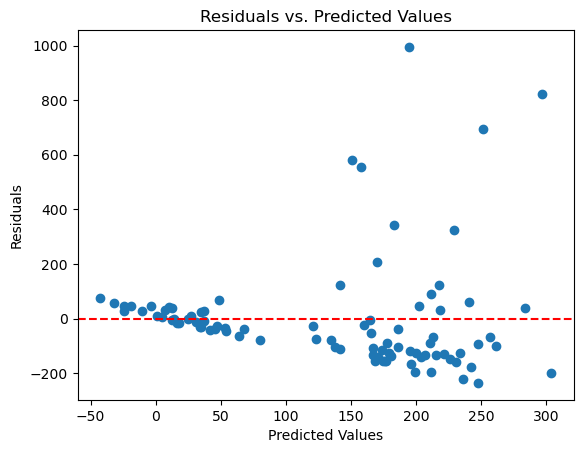

In [26]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

# plotting residuals vs. predictions
plt.scatter(predictions, residuals['kudos'])
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Code taken from Week 4 lab exercises

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

_# Q7d (words): Write your analysis for the Homoscedasticity Test here:_

I'm a bit uncertain of the results, as the errors do seem to increase along the regression line, but a bit more erratic than I was expecting. As such, the errors (the residuals) vary along the regression line, however they are not constant (heteroscedascity). This means that, as the predicted values increase and the errors also increase, there is some sort of information that hasn't been included in the model. If I include this information, then perhaps I can come up with an estimater which gets closer to my Y-values more of the time ([Heteroskedasticity summary](https://www.youtube.com/watch?v=zRklTsY9w9c)). 

**Q8: Multicollinearity**

In [27]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

### Code taken from Week 4 lab exercises

                 feature         VIF
0  masculine_power_score    1.824610
1         published_year  549.189255
2                  words  399.116890
3       lexical_richness  122.716973


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

_# Q8b (words): Write your analysis for the multicollinearity test here:_

As per the Week 4, the Variance Inflation Factor (VIF) is defined as
> a measure of multicollinearity among the predictors in a multiple regression model. Multicollinearity occurs when two or more predictor variables are highly correlated, meaning that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. In the context of regression analysis, multicollinearity can lead to coefficients that are unstable and difficult to interpret. VIF quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. (Week 4 slides)

However, my results do not align with the VIF values mentioned above (see: "the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1"), which is curious, as 2 of the 3 given values had been close to 1 before I re-ran the code. Instead, these numbers seem incredibly inflated for some reason. As such, I do agree with the assessment given above: "there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations."

**Q9: Reflection**

_# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?_

I find the entire idea of using statistics on data such as this quite fascinating, although I have to admit I also found working with this type of code and these statistical models to be quite intimidating. Therefore, I am not entirely convinced of the results I managed to achieve either, particularly when it comes to the VIF score. I also think it would be interesting the run this experiment again with a calculated femininity score of the male participants. As the hypothesis introduces the idea of "low levels of masculinity in male characters positively affect[ing] fanfiction", it would be interesting to shift the question somewhat to the idea of higher levels of femininity positively affecting fanfiction.

## **Reference:** ##

- Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.
- Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.
- Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.
- Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.
- Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.
- Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.
- Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.